In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/jack-bush_striped-column-1964.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/frank-stella_tetuan-iii-1973.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/mark-rothko_no-301.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/gene-davis_sour-ball-beat-1964.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/gene-davis_meandering-1979.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/bridget-riley_ra-2-1981.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/mark-rothko_black-on-maroon-4.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/alma-woodsey-thomas_evening-glow-1972.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/ian-davenport_poured-lines-orange-2005.jpg
/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting/morris-louis_delta-zeta-1960.jpg
/kaggle/input/human-ai-artwork/dat

In [2]:
import os
for dirpath, dirnames, filenames in os.walk('/kaggle/input/human-ai-artwork/data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There are 52 directories and 0 images in "/kaggle/input/human-ai-artwork/data".
There are 0 directories and 1615 images in "/kaggle/input/human-ai-artwork/data/Human_Color_Field_Painting".
There are 0 directories and 2552 images in "/kaggle/input/human-ai-artwork/data/Human_Northern_Renaissance".
There are 0 directories and 6388 images in "/kaggle/input/human-ai-artwork/data/AI_SD_impressionism".
There are 0 directories and 5844 images in "/kaggle/input/human-ai-artwork/data/AI_LD_post_impressionism".
There are 0 directories and 13106 images in "/kaggle/input/human-ai-artwork/data/AI_DiffusionDB_small_2".
There are 0 directories and 5992 images in "/kaggle/input/human-ai-artwork/data/AI_LD_art_nouveau".
There are 0 directories and 4334 images in "/kaggle/input/human-ai-artwork/data/Human_Art_Nouveau_Modern".
There are 0 directories and 216 images in "/kaggle/input/human-ai-artwork/data/Human_Synthetic_Cubism".
There are 0 directories and 6384 images in "/kaggle/input/human-ai-artwork/d

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib

def view_random(target_dir, target_class):
    target_folder = pathlib.Path(target_dir) / target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    path = target_folder / random_image[0]
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img.shape

(1422, 1382, 3)

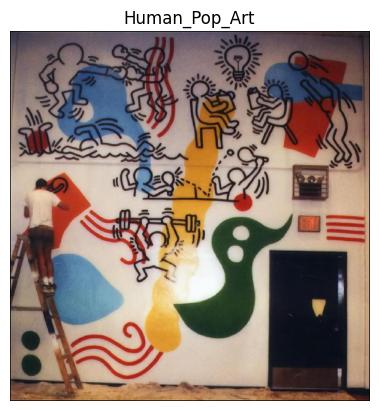

In [4]:
view_random(target_dir = '/kaggle/input/human-ai-artwork/data', target_class = 'Human_Pop_Art')

In [68]:
import os
import shutil
import random


data_dir = "/kaggle/input/human-ai-artwork/data"
base_dir = "/kaggle/working/human_ai_split"


train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15


max_images_per_class = 500


shutil.rmtree(base_dir, ignore_errors=True)


for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(base_dir, split), exist_ok=True)


all_classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
selected_classes = random.sample(all_classes, 20)


for class_name in selected_classes:
    class_path = os.path.join(data_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)
    images = images[:max_images_per_class]

    n_total = len(images)
    n_train = int(train_ratio * n_total)
    n_val = int(val_ratio * n_total)

    train_images = images[:n_train]
    val_images = images[n_train:n_train+n_val]
    test_images = images[n_train+n_val:]

    print(f"{class_name}: Total={n_total}, Train={len(train_images)}, Val={len(val_images)}, Test={len(test_images)}")

    for split_name, split_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
        split_class_dir = os.path.join(base_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)
        for img_name in split_images:
            src_path = os.path.join(class_path, img_name)
            dst_path = os.path.join(split_class_dir, img_name)
            shutil.copy2(src_path, dst_path)


Seçilmiş siniflər (20): ['AI_SD_expressionism', 'Human_Post_Impressionism', 'AI_LD_impressionism', 'Human_Analytical_Cubism', 'AI_SD_realism', 'Human_Naive_Art_Primitivism', 'Human_Color_Field_Painting', 'AI_DiffusionDB_large_3', 'AI_LD_expressionism', 'Human_Symbolism', 'Human_Pop_Art', 'Human_Action_Painting', 'Human_Synthetic_Cubism', 'Human_Pointillism', 'AI_LD_ukiyo-e', 'AI_SD_surrealism', 'Human_Abstract_Expressionism', 'Human_Northern_Renaissance', 'AI_SD_ukiyo-e', 'AI_SD_baroque']
AI_SD_expressionism: Total=500, Train=350, Val=75, Test=75
Human_Post_Impressionism: Total=500, Train=350, Val=75, Test=75
AI_LD_impressionism: Total=500, Train=350, Val=75, Test=75
Human_Analytical_Cubism: Total=110, Train=77, Val=16, Test=17
AI_SD_realism: Total=500, Train=350, Val=75, Test=75
Human_Naive_Art_Primitivism: Total=500, Train=350, Val=75, Test=75
Human_Color_Field_Painting: Total=500, Train=350, Val=75, Test=75
AI_DiffusionDB_large_3: Total=500, Train=350, Val=75, Test=75
AI_LD_expressi

In [69]:
for split in ['train']:
    split_path = os.path.join('/kaggle/working/human_ai_split', split)
    classes = os.listdir(split_path)
    print(f"{split.upper()} classes:", classes)

TRAIN classes: ['AI_LD_impressionism', 'AI_SD_realism', 'Human_Abstract_Expressionism', 'AI_SD_ukiyo-e', 'Human_Analytical_Cubism', 'Human_Synthetic_Cubism', 'AI_SD_surrealism', 'Human_Naive_Art_Primitivism', 'Human_Post_Impressionism', 'AI_LD_expressionism', 'Human_Color_Field_Painting', 'Human_Pop_Art', 'AI_LD_ukiyo-e', 'AI_SD_expressionism', 'AI_SD_baroque', 'Human_Action_Painting', 'AI_DiffusionDB_large_3', 'Human_Symbolism', 'Human_Pointillism', 'Human_Northern_Renaissance']


In [70]:
train_dir = "/kaggle/working/human_ai_split/train"

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} şəkil")

AI_LD_impressionism: 350 şəkil
AI_SD_realism: 350 şəkil
Human_Abstract_Expressionism: 350 şəkil
AI_SD_ukiyo-e: 350 şəkil
Human_Analytical_Cubism: 77 şəkil
Human_Synthetic_Cubism: 151 şəkil
AI_SD_surrealism: 350 şəkil
Human_Naive_Art_Primitivism: 350 şəkil
Human_Post_Impressionism: 350 şəkil
AI_LD_expressionism: 350 şəkil
Human_Color_Field_Painting: 350 şəkil
Human_Pop_Art: 350 şəkil
AI_LD_ukiyo-e: 350 şəkil
AI_SD_expressionism: 350 şəkil
AI_SD_baroque: 350 şəkil
Human_Action_Painting: 68 şəkil
AI_DiffusionDB_large_3: 350 şəkil
Human_Symbolism: 350 şəkil
Human_Pointillism: 350 şəkil
Human_Northern_Renaissance: 350 şəkil


In [71]:
test_dir = "/kaggle/working/human_ai_split/test"

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        print(f"{class_name}: {num_images} şəkil")

AI_LD_impressionism: 75 şəkil
AI_SD_realism: 75 şəkil
Human_Abstract_Expressionism: 75 şəkil
AI_SD_ukiyo-e: 75 şəkil
Human_Analytical_Cubism: 17 şəkil
Human_Synthetic_Cubism: 33 şəkil
AI_SD_surrealism: 75 şəkil
Human_Naive_Art_Primitivism: 75 şəkil
Human_Post_Impressionism: 75 şəkil
AI_LD_expressionism: 75 şəkil
Human_Color_Field_Painting: 75 şəkil
Human_Pop_Art: 75 şəkil
AI_LD_ukiyo-e: 75 şəkil
AI_SD_expressionism: 75 şəkil
AI_SD_baroque: 75 şəkil
Human_Action_Painting: 16 şəkil
AI_DiffusionDB_large_3: 75 şəkil
Human_Symbolism: 75 şəkil
Human_Pointillism: 75 şəkil
Human_Northern_Renaissance: 75 şəkil


In [76]:
import tensorflow as tf

IMG_SIZE = (224, 224)

train_dir = '/kaggle/working/human_ai_split/train'
test_dir = '/kaggle/working/human_ai_split/test'
val_dir = '/kaggle/working/human_ai_split/val'


train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                batch_size = 32,
                                                                seed = 42,
                                                                image_size = IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               batch_size = 32,
                                                               seed = 42,
                                                               image_size = IMG_SIZE)

val_data = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                              batch_size = 32,
                                                              seed = 42,
                                                              image_size = IMG_SIZE)

Found 6246 files belonging to 20 classes.
Found 1341 files belonging to 20 classes.
Found 1337 files belonging to 20 classes.


In [73]:
class_names = train_data.class_names
len(class_names)

20

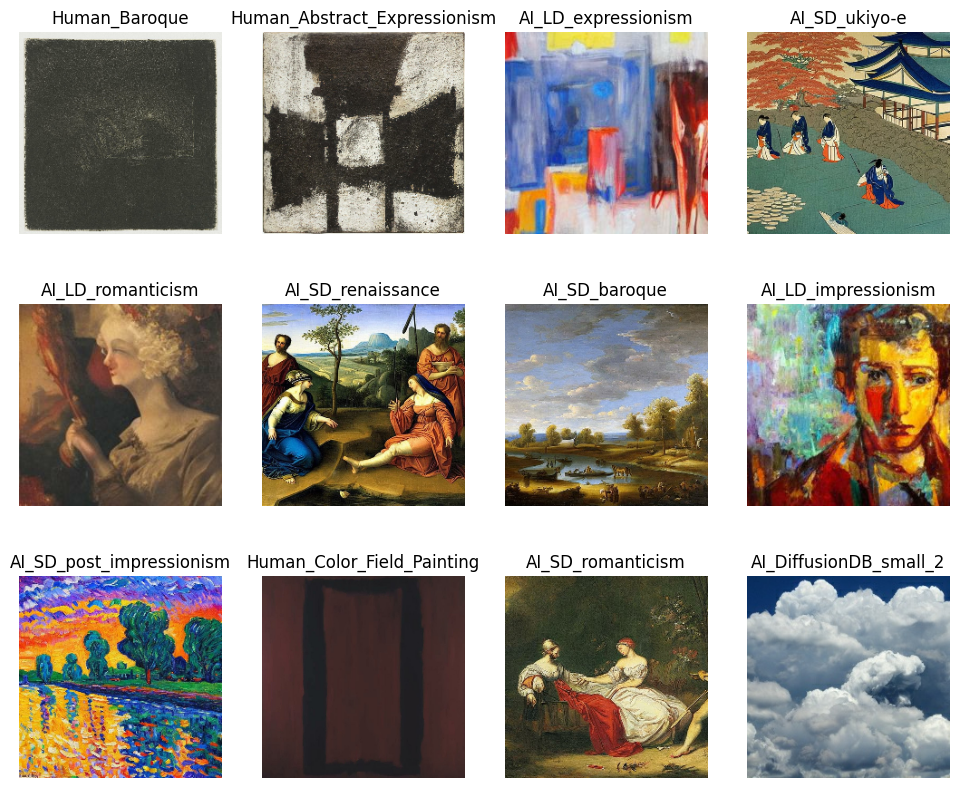

In [51]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(12, 10))

for images, labels in train_data.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i] / 255)
        plt.title(class_names[labels[i].numpy()])
        plt.axis('off')

plt.show()

In [52]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (224, 224, 3)),
    tf.keras.layers.Rescaling(1 / 255),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = 7, strides = 2, padding = 'same',
                          activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 3, strides = 2, padding = 'same'),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                          activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                          activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                          activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, padding = 'same',
                           activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(24, activation = 'softmax')
])

In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 52)                  │           3,380 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,550,452 (28.80 MB)

 Trainable params: 7,550,452 (28.80 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])


In [41]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)

history = model.fit(train_data, validation_data = val_data, epochs = 20, callbacks = [early_stopping])

Epoch 1/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - accuracy: 0.0200 - loss: 4.1644 - val_accuracy: 0.0340 - val_loss: 3.8621
Epoch 2/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.0424 - loss: 3.8355 - val_accuracy: 0.0729 - val_loss: 3.5997
Epoch 3/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 65s 121ms/step - accuracy: 0.0664 - loss: 3.5880 - val_accuracy: 0.1266 - val_loss: 3.3281
Epoch 4/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.1081 - loss: 3.3571 - val_accuracy: 0.1878 - val_loss: 2.9960
Epoch 5/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 65s 120ms/step - accuracy: 0.1464 - loss: 3.1319 - val_accuracy: 0.2226 - val_loss: 2.8216
Epoch 6/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 65s 120ms/step - accuracy: 0.1782 - loss: 2.9440 - val_accuracy: 0.2679 - val_loss: 2.5792
Epoch 7/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 65s 120ms/step - accuracy: 0.2118 - loss: 2.7448 - val_accuracy: 0.2774 - val_loss: 2.5103
Epoch 8/20
541/541 ━━━━━━━━━━━━━━━━━━━━ 65s 120ms/step - accuracy: 0.2424 - loss: 2

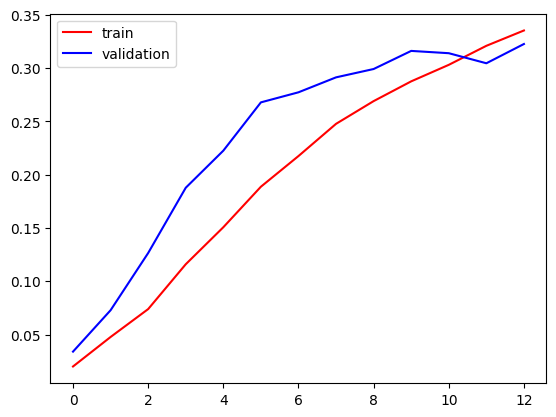

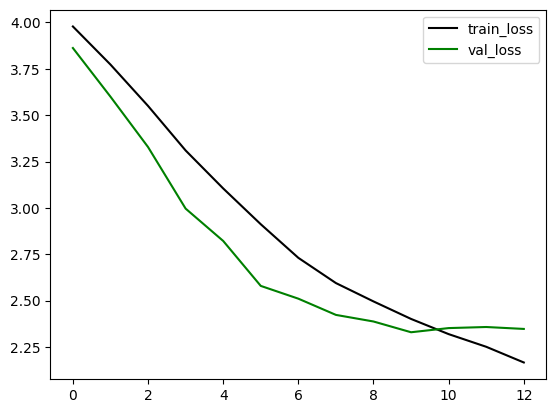

In [42]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()
plt.plot(history.history['loss'], color = 'black', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'val_loss')
plt.legend()
plt.show()

In [87]:
inputs = tf.keras.layers.Input(shape = (224, 224, 3))

x = tf.keras.applications.resnet50.preprocess_input(inputs)

base_model = tf.keras.applications.ResNet50(include_top = False, input_tensor = x)
base_model.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(20, activation = 'softmax')(x)
classifier_model = tf.keras.Model(inputs = inputs, outputs = output)

In [91]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 357,
    decay_rate = 0.96
)


early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience = 3,
                                                  restore_best_weights = True)


classifier_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = classifier_model.fit(train_data, epochs = 15, validation_data = test_data,
                     callbacks = [early_stopping])

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 261ms/step - accuracy: 0.9300 - loss: 0.2472 - val_accuracy: 0.5198 - val_loss: 20.4711
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.9509 - loss: 0.1548 - val_accuracy: 0.7606 - val_loss: 1.0586
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.9711 - loss: 0.0972 - val_accuracy: 0.7338 - val_loss: 1.5700
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.9739 - loss: 0.0826 - val_accuracy: 0.7606 - val_loss: 1.2235
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.9811 - loss: 0.0775 - val_accuracy: 0.8069 - val_loss: 0.8269
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.9907 - loss: 0.0399 - val_accuracy: 0.8173 - val_loss: 0.9406
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.9812 - loss: 0.0531 - val_accuracy: 0.8016 - val_loss: 0.8978
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 167ms/step - accuracy: 0.9853 - loss: 

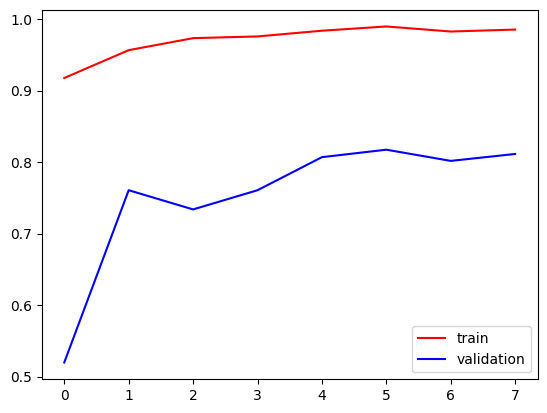

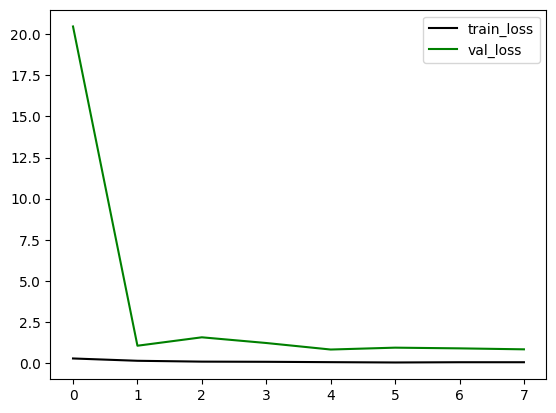

In [93]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()
plt.plot(history.history['loss'], color = 'black', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'val_loss')
plt.legend()
plt.show()

In [92]:
results = classifier_model.evaluate(test_data, batch_size=32)
results

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8060 - loss: 0.8064


[0.8268588781356812, 0.8068605661392212]

In [88]:
# base_model.trainable = True
# for layer in base_model.layers[:-50]:
#     layer.trainable = False

base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False


classifier_model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history = classifier_model.fit(train_data, epochs = 15, validation_data = test_data,
                     callbacks = [early_stopping])

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 79s 242ms/step - accuracy: 0.6218 - loss: 1.3640 - val_accuracy: 0.3945 - val_loss: 23.9774
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 157ms/step - accuracy: 0.8247 - loss: 0.5653 - val_accuracy: 0.7591 - val_loss: 0.8650
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 31s 160ms/step - accuracy: 0.8889 - loss: 0.3405 - val_accuracy: 0.8024 - val_loss: 0.6467
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 164ms/step - accuracy: 0.9403 - loss: 0.1931 - val_accuracy: 0.8158 - val_loss: 0.6385
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 169ms/step - accuracy: 0.9687 - loss: 0.1169 - val_accuracy: 0.7122 - val_loss: 1.3108
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.9617 - loss: 0.1171 - val_accuracy: 0.7651 - val_loss: 1.0398
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.9745 - loss: 0.0876 - val_accuracy: 0.7942 - val_loss: 0.7825


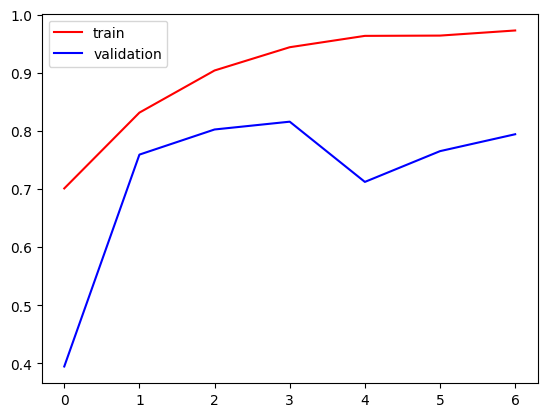

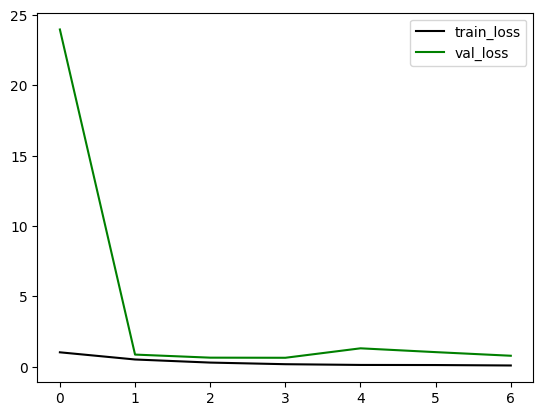

In [89]:
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()
plt.plot(history.history['loss'], color = 'black', label = 'train_loss')
plt.plot(history.history['val_loss'], color = 'green', label = 'val_loss')
plt.legend()
plt.show()

In [90]:
results = classifier_model.evaluate(test_data, batch_size=32)
results

42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8207 - loss: 0.6475


[0.6385324001312256, 0.8158090710639954]

In [99]:

data_dir = "/kaggle/working/human_ai_split/train"

class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
class_indices = {class_name: idx for idx, class_name in enumerate(class_names)}

print(class_indices)


{'AI_DiffusionDB_large_3': 0, 'AI_LD_expressionism': 1, 'AI_LD_impressionism': 2, 'AI_LD_ukiyo-e': 3, 'AI_SD_baroque': 4, 'AI_SD_expressionism': 5, 'AI_SD_realism': 6, 'AI_SD_surrealism': 7, 'AI_SD_ukiyo-e': 8, 'Human_Abstract_Expressionism': 9, 'Human_Action_Painting': 10, 'Human_Analytical_Cubism': 11, 'Human_Color_Field_Painting': 12, 'Human_Naive_Art_Primitivism': 13, 'Human_Northern_Renaissance': 14, 'Human_Pointillism': 15, 'Human_Pop_Art': 16, 'Human_Post_Impressionism': 17, 'Human_Symbolism': 18, 'Human_Synthetic_Cubism': 19}


In [101]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input



img_path = '/kaggle/input/hugvbnkbuvyv/HD-wallpaper-mountain-minimalism-mountains-artist-artwork-digital-art-minimalism-minimalist-ai-artstation.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


predicted_class_index = np.argmax(preds, axis=1)[0]
predicted_class_index


indices_to_class = {v: k for k, v in class_indices.items()}
indices_to_class[predicted_class_index]

'AI_DiffusionDB_large_3'